In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
!pip install uproot
import uproot as ur


plt.rcParams["figure.figsize"] = (10, 8)

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
cmap = mpl.cm.get_cmap('viridis')

#norm = mpl.colors.LogNorm(vmin=0.1, vmax=100.0)
MIP=0.000472


In [11]:
dirs={"H4": "/media/miguel/Elements/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_08_18/",
      "H1": "/media/miguel/Elements/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_unstaggered_08_26/"}

['ZDCHcalHitsDigi.cellID', 'ZDCHcalHitsDigi.amplitude', 'ZDCHcalHitsDigi.timeStamp', 'ZDCHcalHitsReco.cellID', 'ZDCHcalHitsReco.energy', 'ZDCHcalHitsReco.energyError', 'ZDCHcalHitsReco.time', 'ZDCHcalHitsReco.timeError', 'ZDCHcalHitsReco.position.x', 'ZDCHcalHitsReco.position.y', 'ZDCHcalHitsReco.position.z', 'ZDCHcalHitsReco.dimension.x', 'ZDCHcalHitsReco.dimension.y', 'ZDCHcalHitsReco.dimension.z', 'ZDCHcalHitsReco.sector', 'ZDCHcalHitsReco.layer', 'ZDCHcalHitsReco.local.x', 'ZDCHcalHitsReco.local.y', 'ZDCHcalHitsReco.local.z', 'InclusiveKinematicsTruth.x', 'InclusiveKinematicsTruth.Q2', 'InclusiveKinematicsTruth.W', 'InclusiveKinematicsTruth.y', 'InclusiveKinematicsTruth.nu', 'InclusiveKinematicsTruth#0.index', 'InclusiveKinematicsTruth#0.collectionID', 'MCParticles.PDG', 'MCParticles.generatorStatus', 'MCParticles.simulatorStatus', 'MCParticles.charge', 'MCParticles.time', 'MCParticles.mass', 'MCParticles.vertex.x', 'MCParticles.vertex.y', 'MCParticles.vertex.z', 'MCParticles.endpo

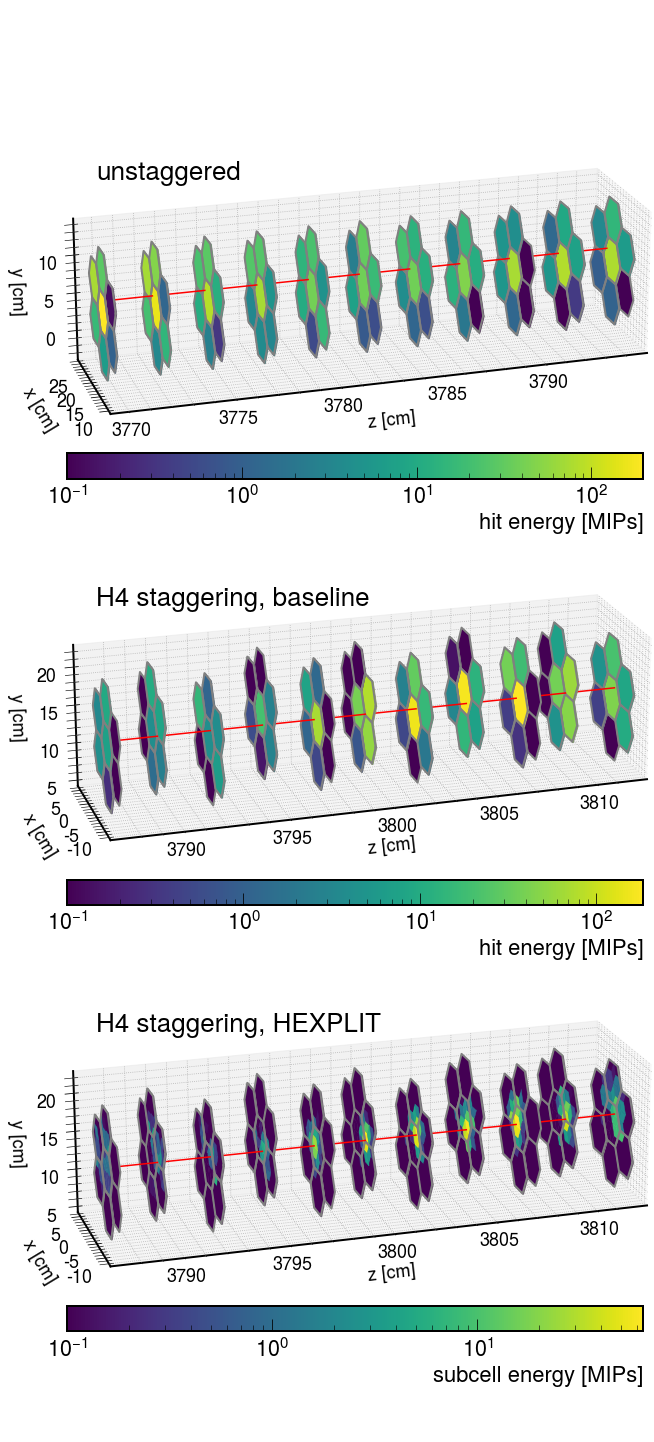

['ZDCHcalHitsDigi.cellID', 'ZDCHcalHitsDigi.amplitude', 'ZDCHcalHitsDigi.timeStamp', 'ZDCHcalHitsReco.cellID', 'ZDCHcalHitsReco.energy', 'ZDCHcalHitsReco.energyError', 'ZDCHcalHitsReco.time', 'ZDCHcalHitsReco.timeError', 'ZDCHcalHitsReco.position.x', 'ZDCHcalHitsReco.position.y', 'ZDCHcalHitsReco.position.z', 'ZDCHcalHitsReco.dimension.x', 'ZDCHcalHitsReco.dimension.y', 'ZDCHcalHitsReco.dimension.z', 'ZDCHcalHitsReco.sector', 'ZDCHcalHitsReco.layer', 'ZDCHcalHitsReco.local.x', 'ZDCHcalHitsReco.local.y', 'ZDCHcalHitsReco.local.z', 'InclusiveKinematicsTruth.x', 'InclusiveKinematicsTruth.Q2', 'InclusiveKinematicsTruth.W', 'InclusiveKinematicsTruth.y', 'InclusiveKinematicsTruth.nu', 'InclusiveKinematicsTruth#0.index', 'InclusiveKinematicsTruth#0.collectionID', 'MCParticles.PDG', 'MCParticles.generatorStatus', 'MCParticles.simulatorStatus', 'MCParticles.charge', 'MCParticles.time', 'MCParticles.mass', 'MCParticles.vertex.x', 'MCParticles.vertex.y', 'MCParticles.vertex.z', 'MCParticles.endpo

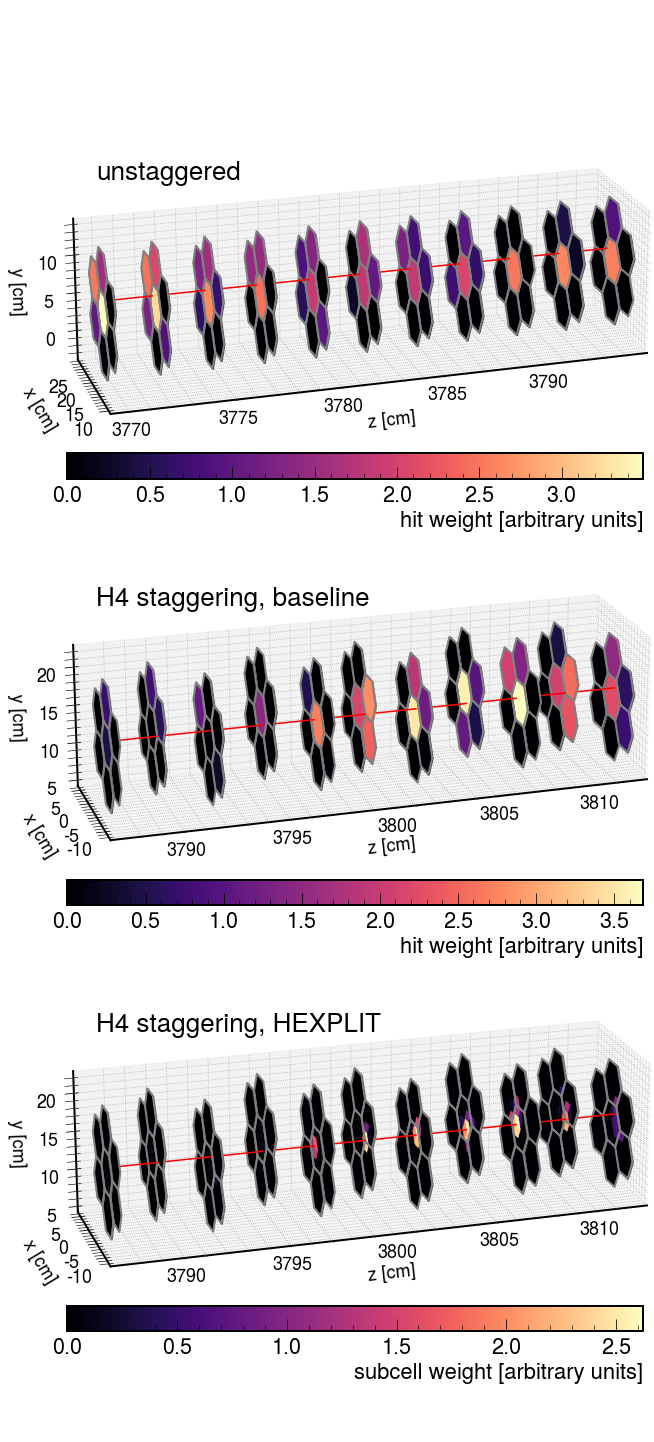

In [273]:

def calc_zorder(z):
    return 35000/10+1620/10-z

MIP=0.000472

layer_thickness=25

sqrt3=np.sqrt(3)

def mx(a,b):
    return a*(a>b)+b*(b>=a)
import glob

def closest(lst, K): 
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

l=np.log(100/50)
w0=5.0
w0=5.0+0.65*l+0.31*l*l

layouts=["H1", "H4", "H4"]
figsize=(16*3, 16*2/3*3)
figsize=(16, 16)
for column in "energy", "weight":
    cmap = mpl.cm.get_cmap('viridis') if column == "energy" else mpl.cm.get_cmap('magma')
    fig=plt.figure(figsize=figsize)
    for i in range(0,3):
        input_file=glob.glob(dirs[layouts[i]]+"/*")[1]
        #ax0 = fig.add_subplot(111, projection='3d',azim=-104, elev=20,computed_zorder=False)
        ax0 = fig.add_subplot(i+311, projection='3d',azim=-107, elev=20,computed_zorder=False)
        arrays=ur.open(f'{input_file}:events').arrays()
        for event in range(len(arrays)):
            pz=arrays['MCParticles.momentum.z'][event][2]
            if pz > 97 and pz<103:
                break #found an event at ~100 GeV
        x=arrays['ZDCHcalHitsReco.position.x'][event]
        y=arrays['ZDCHcalHitsReco.position.y'][event]
        z=arrays['ZDCHcalHitsReco.position.z'][event]
        E=arrays['ZDCHcalHitsReco.energy'][event]
        print(arrays.fields)
        cid=arrays['ZDCHcalHitsReco.cellID'][event]
        print(len(cid), len(E), cid)
    
        px=arrays['MCParticles.momentum.x'][event][2]
        py=arrays['MCParticles.momentum.y'][event][2]
        pz=arrays['MCParticles.momentum.z'][event][2]
        
        sl=31.3
        window=2*sl
        xsh=px/pz*37500
        ysh=py/pz*37500
    
        if i == 0:
            setx=list(set(x))
            xsh=closest(setx, xsh)
            sety=list(set(y))
            ysh=closest(sety, ysh)
        else:
            setx=list(set(x))
            xsh=closest(setx, xsh)
            sety=list(set(y))
            ysh=closest(sety, ysh)
        
        z_avg=np.sum(z*E)/np.sum(E)
        nlayers=11
        zmin, zmax= z_avg-nlayers/2*layer_thickness, z_avg+nlayers/2*layer_thickness
        slc=(E>0.01*MIP) & (np.abs(x-xsh)<window) & (np.abs(y-ysh)<window) & (z>zmin) & (z<zmax)
    
    
        
        x=x[slc]
        y=y[slc]
        z=z[slc]
        E=E[slc]
    
        phi=np.linspace(-np.pi, np.pi, 7)
        sl=31.3
        dx=sl*np.cos(phi)
        dy=sl*np.sin(phi)
        dz=0*phi
        sumE=sum(E)
        maxE=max(E)
        w=mx(w0+np.log(E/sumE),0)
        maxw=max(w)
        sumw=sum(w)
        if i != 2:
            if column == "weight":
                norm=mpl.colors.Normalize(vmin=0, vmax=maxw)
            else:
                norm=mpl.colors.LogNorm(0.1, maxE/MIP)
            for j in range(len(x)):
                vx = (x[j]+dx)/10
                vy = (y[j]+dy)/10
                vz = (z[j]+dz)/10
                verts = [list(zip(vz,vx,vy))]
                val=w[j] if column == "weight" else E[j]/MIP
                
                ax0.add_collection3d(Poly3DCollection(verts, 
                                                      alpha=1, color=cmap(norm(val)),
                                    zorder=calc_zorder(z[j])))
            
            
        else:
            #run sub-cell reweighting, H4
            phi=np.linspace(0, np.pi*5/3, 6)
            cph=np.cos(phi)
            sph=np.sin(phi)
        
            offsetsx=np.concatenate((1.5*cph, -sqrt3/2*sph))*sl
            offsetsy=np.concatenate((1.5*sph, sqrt3/2*cph))*sl
            
    
            #determine the positions of the vertices
            subcell_offsetsx=[]
            subcell_offsetsy=[]
            subcell_offsetsx+=[[sl/2*cph[k], sl/2*(cph[k]+cph[(k+1)%6]), 
                                sl*cph[k], sl/2*(cph[k]+cph[(k+5)%6])] for k in range(6)]
            subcell_offsetsx+=[[0, sl/4*cph[k]-sqrt3*sl*sph[k]/4, 
                                -sqrt3*sl*sph[k]/2, -sl/4*cph[k]-sqrt3*sl*sph[k]/4] for k in range(6)]
            
            subcell_offsetsy+=[[sl/2*sph[k], sl/2*(sph[k]+sph[(k+1)%6]), 
                                sl*sph[k], sl/2*(sph[k]+sph[(k+5)%6])] for k in range(6)]
            subcell_offsetsy+=[[0, sqrt3*sl*cph[k]/4+sl/4*sph[k], 
                                sqrt3*sl*cph[k]/2, sqrt3*sl*cph[k]/4-sl/4*sph[k]] for k in range(6)]
            subcell_offsetsz=[[0]*4]*12
            tol=0.01
            Esub_all=[]
            all_subcells=[]
            for j in range(len(x)):
                Eneighbors=[0,0,0,0,0,0,0,0,0,0,0,0]
                for k in range(12):
                    neighborx=x[j]+offsetsx[k]
                    neighbory=y[j]+offsetsy[k]
                    count_neighbors=0
                    for l in range(len(x)):
                        if abs(x[l]-neighborx)<tol and abs(y[l]-neighbory)<tol\
                              and abs(z[l]-z[j])<layer_thickness*2.5:
                            Eneighbors[k]+=E[l]
                            #check if all neighbors at a given transverse 
                            # position have been found yet
                            if abs(z[l]-z[j])<layer_thickness*1.5:
                                break
                            else :
                                count_neighbors+=1
                                if count_neighbors==2:
                                    break
                #print(Eneighbors)
                Eneighbors=mx(np.array(Eneighbors),MIP)
            
            
                reweight_energy_1=Eneighbors[:6]*np.roll(Eneighbors[6:],1)*np.roll(Eneighbors[6:],2)
                reweight_energy_2=Eneighbors[6:]*np.roll(Eneighbors[6:],-1)*np.roll(Eneighbors[6:],1)
                reweight_energy=np.concatenate([reweight_energy_1, reweight_energy_2])
                reweight_energy/=sum(reweight_energy)
                Esub=E[j]*reweight_energy
                for k in range(len(subcell_offsetsx)):    
                    vx = (x[j]+subcell_offsetsx[k])/10
                    vy = (y[j]+subcell_offsetsy[k])/10
                    vz = (z[j]+subcell_offsetsz[k])/10
                    verts = [list(zip(vz,vx,vy))]
                    all_subcells.append(verts)
                Esub_all=np.concatenate([Esub_all, Esub])
            w_all=mx(0, w0+np.log(Esub_all/sumE))
            maxEsub=max(Esub_all)
            maxw=max(w_all)
            sumw=sum(w_all)

            if column == "weight":
                norm=mpl.colors.Normalize(vmin=0, vmax=maxw)
            else:
                norm=mpl.colors.LogNorm(0.1, maxEsub/MIP)
            
            for j in range(len(all_subcells)):
                if column=="weight":
                    val=w_all[j]
                else:
                    val=Esub_all[j]/MIP
                ax0.add_collection3d(Poly3DCollection(all_subcells[j], 
                                                  alpha=1, color=cmap(norm(val)),
                                zorder=calc_zorder(10*all_subcells[j][0][0][0]), lw=0.5))
        for j in range(len(x)):        
            #cell outlines        
            phi=np.linspace(-np.pi, np.pi, 7)
            sl=31.3
            dx=sl*np.cos(phi)
            dy=sl*np.sin(phi)
            dz=0*phi
            vx = (x[j]+dx)/10
            vy = (y[j]+dy)/10
            vz = (z[j]+dz)/10
            verts = [list(zip(vz,vx,vy))]
            ax0.plot(vz, vx, vy, color='0.5', zorder=calc_zorder(z[j])+1, lw=2)
        layers_z=list(sorted(set(z)))
        for j in range(len(layers_z)-1):
            zz=np.array(layers_z[j:j+2])/10
            #print(zz)
            zorder=calc_zorder((layers_z[j]+layers_z[j+1])/2)
            ax0.plot(zz, zz*(px/pz), zz*py/pz,  color='r', ls='-',
                   zorder=zorder)

        #now add the missing cells (place them in the same place as the real ones, but with a lower zorder
        phi=np.linspace(-np.pi, np.pi, 7)
        dx=sl*sqrt3*np.sin(phi)
        dy=-sl*sqrt3*np.cos(phi)
        for j, zj in enumerate(layers_z):
            xb = closest(x[z==zj], xsh)
            yb = closest(y[z==zj], ysh)
            if j%4==0 and i !=0: #patch an issue where it centers around the wrong hexagon
                xb-=3/2*sl
            for k in range(6):
                xa=xb+dx[k]
                ya=yb+dy[k]
                verts=[list(zip(zj/10+0*phi, (xa+sl*np.cos(phi))/10, (ya+sl*np.sin(phi))/10))]
                plt.gca().add_collection3d(Poly3DCollection(verts, 
                                                      alpha=1, facecolor=cmap(0),
                                    zorder=calc_zorder(zj+1), edgecolor='0.5', lw=2))
                    
        
        plt.gca().set_xlim(min(z)/10, max(z)/10)
        plt.gca().set_ylim((xsh-window-sl)/10, (xsh+window+sl)/10)
        plt.gca().set_zlim((ysh-window-sl*np.sqrt(3)/2)/10, (ysh+window+sl*np.sqrt(3)/2)/10)
        #plt.scatter(z,x,y)
        plt.gca().set_box_aspect((3.7,1,1))
        plt.gca().set_xlabel("\n\nz [cm]", fontsize=18)
        plt.gca().set_ylabel("\nx [cm]", fontsize=18)
        plt.gca().set_zlabel("\ny [cm]", fontsize=18)
        plt.gca().tick_params(axis='x', labelsize=18)
        plt.gca().tick_params(axis='y', labelsize=18)
        plt.gca().tick_params(axis='z', labelsize=18)
        
        if i == 0:
            left=0; bottom=0.74; width=1; height=0.5
        elif i == 1:
            left=0; bottom=0.37; width=1; height=0.5
        else:
            left=0; bottom=0; width=1; height=0.5
        ax0.set_position([left, bottom, width, height])
        print(pz)
        label = ("unstaggered", "H4 staggering, baseline", "H4 staggering, HEXPLIT")[i]
        ax0.text2D(0.05, 0.7, label, transform=ax0.transAxes)
        ax0.set_facecolor((0,0,0,0))
        import matplotlib.ticker as ticker
        ax0.xaxis.set_major_locator(ticker.MultipleLocator(5))
        ax0.xaxis.set_minor_locator(ticker.MultipleLocator(1))
        
        ax0.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax0.yaxis.set_minor_locator(ticker.MultipleLocator(1))
        
        ax0.zaxis.set_major_locator(ticker.MultipleLocator(5))
        ax0.zaxis.set_minor_locator(ticker.MultipleLocator(1))
    
        y=list(reversed([0.09, 0.46, 0.83]))[i]
        # if column == "weight":
        #     norm=mpl.colors.Normalize(vmin=0, vmax=maxw)
        # else :
        #     norm=mpl.colors.LogNorm(vmin=0.1, vmax=maxE/MIP)
        
        cm = mpl.cm
        cax=fig.add_subplot()
        cax.set_position([0.25, y, .5, 0.022])
        cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal',
                         aspect=40)
        if column == "weight":
            cb.set_label("hit weight [arbitrary units]" if i != 2 else "subcell weight [arbitrary units]", fontsize=22)
        else:
            cb.set_label("hit energy [MIPs]" if i != 2 else "subcell energy [MIPs]", fontsize=22)
        cb.solids.set_edgecolor("face")
    plt.savefig(f"images/H4_illustration_{column}.pdf")
    plt.show()
        

[37920.65, 37945.55, 37970.45, 37995.35, 38020.25]
[0.01885986328125, 0.015002441417891532, 0.0012634277809411287, 0, 0.003961181559134275, 0, 0.03673095628619194, 0.009246826171875, 0.0013671874767169356, 0.025970458984375, 0.07535400683991611, 0.00957641564309597]
0 0.0062144843866145235 [-3.91250015 -3.13000015 -2.34750015 -3.13000015] [13.55329742 14.90862718 13.55329742 12.19796767]
1 0.0024096523279116167 [-4.69500015 -5.47750015 -3.91250015 -3.13000015] [14.90862718 16.26395694 16.26395694 14.90862718]
2 0.0001959442729524083 [-6.26000015 -7.82500015 -7.04250015 -5.47750015] [14.90862718 14.90862718 16.26395694 16.26395694]
3 2.724708127988617e-06 [-7.04250015 -7.82500015 -8.60750015 -7.82500015] [13.55329742 12.19796767 13.55329742 14.90862718]
4 6.422286398452358e-05 [-6.26000015 -5.47750015 -7.04250015 -7.82500015] [12.19796767 10.84263791 10.84263791 12.19796767]
5 0.0004217792376014948 [-4.69500015 -3.13000015 -3.91250015 -5.47750015] [12.19796767 12.19796767 10.84263791 10

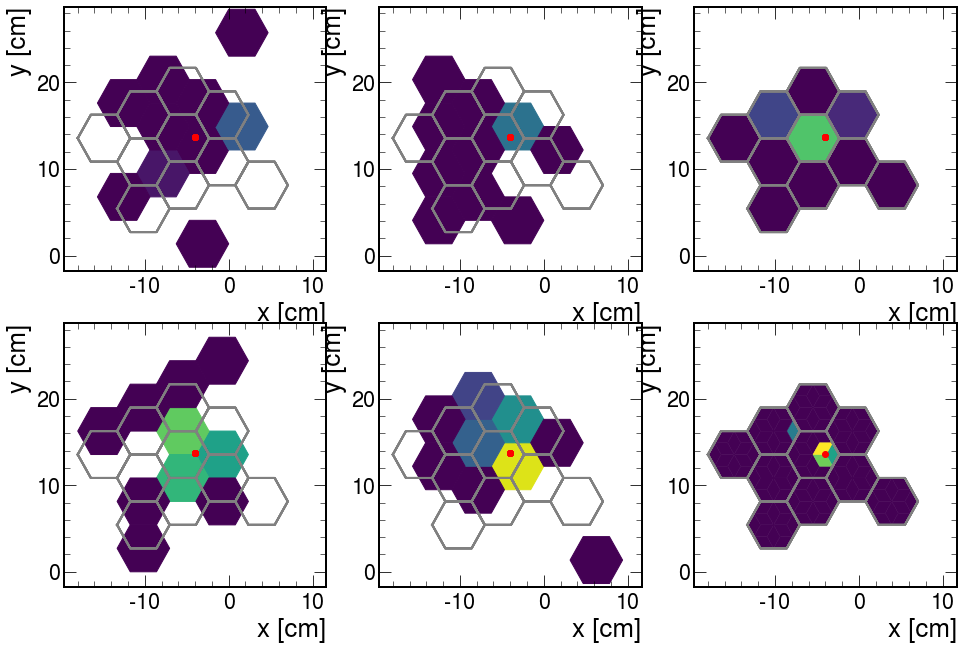

In [202]:

def calc_zorder(z):
    return 35000/10+1620/10-z

MIP=0.000472
cmap = mpl.cm.get_cmap('viridis')

layer_thickness=25

sqrt3=np.sqrt(3)

def mx(a,b):
    return a*(a>b)+b*(b>=a)
import glob


l=np.log(100/50)
w0=5.0
w0=5.0+0.65*l+0.31*l*l

layouts=["H4"]
input_file=glob.glob(dirs[layouts[0]]+"/*")[1]
fig, axs=plt.subplots(2,3,figsize=(16, 16*2/3))
arrays=ur.open(f'{input_file}:events').arrays()
for event in range(len(arrays)):
    pz=arrays['MCParticles.momentum.z'][event][2]
    if pz > 97 and pz<103:
        break #found an event at ~100 GeV


x=arrays['ZDCHcalHitsReco.position.x'][event]
y=arrays['ZDCHcalHitsReco.position.y'][event]
z=arrays['ZDCHcalHitsReco.position.z'][event]
E=arrays['ZDCHcalHitsReco.energy'][event]


px=arrays['MCParticles.momentum.x'][event][2]
py=arrays['MCParticles.momentum.y'][event][2]
pz=arrays['MCParticles.momentum.z'][event][2]

sl=31.3
window=4*sl
xsh=px/pz*37500
ysh=py/pz*37500

z_avg=np.sum(z*E)/np.sum(E)
nlayers=11
zmin, zmax= z_avg-nlayers/2*layer_thickness, z_avg+nlayers/2*layer_thickness
slc=(E>0.5*MIP) & (np.abs(x-xsh)<window) & (np.abs(y-ysh)<window) & (z>zmin) & (z<zmax)



x=x[slc]
y=y[slc]
z=z[slc]
E=E[slc]

sign=1

z_vals=list(sorted(set(z)))[-9:-4]
print(z_vals)

phi=np.linspace(-np.pi, np.pi, 7)
sl=31.3
dx=sl*np.cos(phi)
dy=sl*np.sin(phi)
dz=0*phi
sumE=sum(E)
w=mx(w0+np.log(E/sumE),0)
maxw=max(w)

for i in range(6):
    plt.sca(axs[i//3][i%3])
    plt.gca().set_xlim((xsh-window-sl)/10, (xsh+window+sl)/10)
    plt.gca().set_ylim((ysh-window-sl*np.sqrt(3)/2)/10, (ysh+window+sl*np.sqrt(3)/2)/10)
    if i !=5:
        for j in range(len(x)):
            if z[j]== z_vals[i]:
                vx = (x[j]+dx)/10
                vy = (y[j]+dy)/10
                verts = list(zip(vx,vy))
                plt.gca().add_patch(mpl.patches.Polygon(verts, alpha=1, color=cmap(0.001+w[j]/maxw)))
    else:
        #run sub-cell reweighting, H4
        phi=np.linspace(0, np.pi*5/3, 6)
        cph=np.cos(phi)
        sph=np.sin(phi)
    
        offsetsx=np.concatenate((1.5*cph, -sqrt3/2*sph))*sl
        offsetsy=np.concatenate((1.5*sph, sqrt3/2*cph))*sl
    
        #determine the positions of the vertices
        subcell_offsetsx=[]
        subcell_offsetsy=[]
        subcell_offsetsx+=[[sl/2*cph[k], sl/2*(cph[k]+cph[(k+1)%6]), 
                            sl*cph[k], sl/2*(cph[k]+cph[(k+5)%6])] for k in range(6)]
        subcell_offsetsx+=[[0, sl/4*cph[k]-sqrt3*sl*sph[k]/4, 
                            -sqrt3*sl*sph[k]/2, -sl/4*cph[k]-sqrt3*sl*sph[k]/4] for k in range(6)]
        
        subcell_offsetsy+=[[sl/2*sph[k], sl/2*(sph[k]+sph[(k+1)%6]), 
                            sl*sph[k], sl/2*(sph[k]+sph[(k+5)%6])] for k in range(6)]
        subcell_offsetsy+=[[0, sqrt3*sl*cph[k]/4+sl/4*sph[k], 
                            sqrt3*sl*cph[k]/2, sqrt3*sl*cph[k]/4-sl/4*sph[k]] for k in range(6)]
        subcell_offsetsz=[[0]*4]*12
        tol=0.01
        Esub_all=[]
        all_subcells=[]
        for j in range(len(x)):
            
            Eneighbors=[0,0,0,0,0,0,0,0,0,0,0,0]
            for k in range(12):
                neighborx=x[j]+offsetsx[k]*sign
                neighbory=y[j]+offsetsy[k]*sign
                count_neighbors=0
                for l in range(len(x)):
                    if abs(x[l]-neighborx)<tol and abs(y[l]-neighbory)<tol\
                          and abs(z[l]-z[j])<layer_thickness*2.5:
                        Eneighbors[k]+=E[l]
                        #check if all neighbors at a given transverse 
                        # position have been found yet
                        if abs(z[l]-z[j])<layer_thickness*1.5:
                            break
                        else :
                            count_neighbors+=1
                            if count_neighbors==2:
                                break
            #print(Eneighbors)
            if z[j]== z_vals[2] and abs(y[j]/10-14)<1:
                print(Eneighbors)
            Eneighbors=mx(np.array(Eneighbors),MIP)
        
            
            reweight_energy_1=Eneighbors[:6]*np.roll(Eneighbors[6:],1)*np.roll(Eneighbors[6:],2)
            reweight_energy_2=Eneighbors[6:]*np.roll(Eneighbors[6:],-1)*np.roll(Eneighbors[6:],1)
            reweight_energy=np.concatenate([reweight_energy_1, reweight_energy_2])
            reweight_energy/=sum(reweight_energy)
            Esub=E[j]*reweight_energy
            for k in range(len(subcell_offsetsx)):    
                vx = (x[j]+subcell_offsetsx[k])/10
                vy = (y[j]+subcell_offsetsy[k])/10
                vz = (z[j]+subcell_offsetsz[k])/10
                verts = list(zip(vx,vy))
                if z[j]== z_vals[2]:
                    if abs(y[j]/10-14)<1:
                        print(k, Esub[k], vx, vy)
                    all_subcells.append(verts)
                    Esub_all.append(Esub[k])
        w_all=mx(0, w0+np.log(np.array(Esub_all)/sumE))
        for j in range(len(all_subcells)):
            plt.gca().add_patch(mpl.patches.Polygon(all_subcells[j], 
                                              alpha=1, color=cmap(w_all[j]/max(w_all)), lw=0.5, zorder=2))
    for i in range(6):
        plt.sca(axs[i//3][i%3])
        for j in range(len(x)):        
            #cell outlines        
            phi=np.linspace(-np.pi, np.pi, 7)
            sl=31.3
            dx=sl*np.cos(phi)
            dy=sl*np.sin(phi)
            dz=0*phi
            vx = (x[j]+dx)/10
            vy = (y[j]+dy)/10
            vz = (z[j]+dz)/10
            if z[j]== z_vals[2]:
                #print(vx, vy)
                plt.gca().plot(vx, vy, color='0.5', zorder=8, lw=2)
    layers_z=list(sorted(set(z)))
    for i in range(6):
        zz=z_vals[i]/10 if i !=5 else z_vals[2]/10
        #print(zz)
        axs[i//3][i%3].plot([zz*(px/pz)], [zz*py/pz],  color='r', marker='o')
    
    #plt.gca().set_xlim(min(z)/10, max(z)/10)
    #plt.gca().set_ylim((xsh-window-sl)/10, (xsh+window+sl)/10)
    #plt.gca().set_zlim((ysh-window-sl*np.sqrt(3)/2)/10, (ysh+window+sl*np.sqrt(3)/2)/10)
    #plt.scatter(z,x,y)
for row in axs:
    for ax in row:
        ax.set_xlabel("x [cm]")
        ax.set_ylabel("y [cm]")
plt.subplots_adjust()
#plt.gca().set_zlabel("\ny [cm]")
plt.show()
        

0 [0, 11, 10]
1 [1, 6, 11]
2 [2, 7, 6]
3 [3, 8, 7]
4 [4, 9, 8]
5 [5, 10, 9]
6 [6, 7, 11]
7 [7, 8, 6]
8 [8, 9, 7]
9 [9, 10, 8]
10 [10, 11, 9]
11 [11, 6, 10]


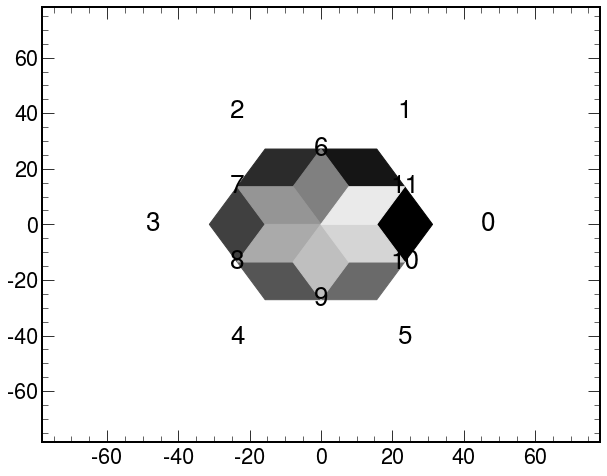

In [176]:
#check that everything is where it should be:
phi=np.linspace(0, np.pi*5/3, 6)
cph=np.cos(phi)
sph=np.sin(phi)


offsetsx=np.concatenate((1.5*cph, -sqrt3/2*sph))*sl
offsetsy=np.concatenate((1.5*sph, sqrt3/2*cph))*sl
Eneighbors=[0,0,0,0,0,0,0,0,0,0,0,0]

#determine the positions of the vertices
subcell_offsetsx=[]
subcell_offsetsy=[]
subcell_offsetsx+=[[sl/2*cph[k], sl/2*(cph[k]+cph[(k+1)%6]), 
                    sl*cph[k], sl/2*(cph[k]+cph[(k+5)%6])] for k in range(6)]
subcell_offsetsx+=[[0, sl/4*cph[k]-sqrt3*sl*sph[k]/4, 
                    -sqrt3*sl*sph[k]/2, -sl/4*cph[k]-sqrt3*sl*sph[k]/4] for k in range(6)]

subcell_offsetsy+=[[sl/2*sph[k], sl/2*(sph[k]+sph[(k+1)%6]), 
                    sl*sph[k], sl/2*(sph[k]+sph[(k+5)%6])] for k in range(6)]
subcell_offsetsy+=[[0, sqrt3*sl*cph[k]/4+sl/4*sph[k], 
                    sqrt3*sl*cph[k]/2, sqrt3*sl*cph[k]/4-sl/4*sph[k]] for k in range(6)]

for i in range(12):
    #print(list(zip(subcell_offsetsx[i],subcell_offsetsy[i])))
    plt.gca().add_patch(mpl.patches.Polygon(list(zip(subcell_offsetsx[i],subcell_offsetsy[i])), color=f'{i/12}'))
for i in range(12):
    plt.text(offsetsx[i], offsetsy[i], f"{i}",ha='center', va='center')
plt.xlim(-sl*2.5, sl*2.5)
plt.ylim(-sl*2.5, sl*2.5)

r=range(12)
groups1=[r[:6],np.roll(r[6:],1),np.roll(r[6:],2)]
groups2=[r[6:],np.roll(r[6:],-1),np.roll(r[6:],1)]
for i in range(6):
    print(i,[groups1[k][i] for k in range(3)])
for i in range(6):
    print(i+6,[groups2[k][i] for k in range(3)])

In [16]:
Rm=3.1
def draw_Rm(ax,z, pxpz, pypz, **arg):
    ph=np.linspace(-np.pi, np.pi, 101)
    ax.plot(np.repeat(z, len(ph)), pxpz*z+Rm*np.cos(ph), pypz*z+Rm*np.sin(ph), **arg)

In [36]:
def mx(a,b):
    return a*(a>b)+b*(b>=a)

def calc_zorder(z):
    return 35000/10+1620/10-z


import matplotlib.ticker as ticker

def show_shower(input_file, event, layer, x_offset=0, z_range=None, y_range=None, x_range=None, prefix='ZDCHcal',
               w0_nrw=4.0, w0_rw=5.0):
    MIP=0.000472
    cmap = mpl.cm.get_cmap('viridis')
    
    fig=plt.figure(figsize=(16, 16))
    ax0 = fig.add_subplot(311, projection='3d',azim=-104, elev=20,computed_zorder=False)
    ax1 = fig.add_subplot(312, projection='3d',azim=-104, elev=20,computed_zorder=False)
    ax2 = fig.add_subplot(313, projection='3d',azim=-104, elev=20,computed_zorder=False)
    plt.sca(ax1)
    events = ur.open(f'{input_file}:events')
    arrays_sim = events.arrays()
    #print(arrays_sim.fields)

    E=arrays_sim[f'{prefix}HitsReco.energy'][event,:]
    x=arrays_sim[f'{prefix}HitsReco.position.x'][event,:]/10-x_offset
    y=arrays_sim[f'{prefix}HitsReco.position.y'][event,:]/10
    z=arrays_sim[f'{prefix}HitsReco.position.z'][event,:]/10
    sl=arrays_sim[f'{prefix}HitsReco.dimension.x'][event,0]/2/10
    
    px,py,pz=[arrays_sim[f'MCParticles.momentum.{a}'][event,2] for a in 'xyz']
    xtruth=35000/10*(px/pz-x_offset/(35000/10))
    ytruth=35000/10*py/pz
    window=4*sl
    
    
    phi=np.linspace(-np.pi, np.pi, 7)
    dx=sl*np.cos(phi)
    dy=sl*np.sin(phi)
    dz=0*phi
    MIP=0.000472
    
    
    layers_z=sorted(list(set(z)))
    
    norm = mpl.colors.LogNorm(vmin=.1, vmax=max(E)/MIP)

    w0=w0_nrw
    Etot=sum(E)
    w=w0+np.log((E+.0000001)/Etot)
    w=w*(w>0)
    alpha=w/max(w)
    
    if x_range is None:
        x_range=xtruth-window/2,xtruth+window/2
    if y_range is None:
        y_range=ytruth-window/2,ytruth+window/2
    
    in_window=(x >x_range[0]) & (x <x_range[1]) & (y <y_range[1]) & \
                            (y>y_range[0])
    
    for i in range(len(E)):
        
        if not in_window[i]:
            continue
        
        vx = x[i]+dx
        vy = y[i]+dy
        vz = z[i]+dz
        verts = [list(zip(vz,vx,vy))]
        #if alpha[i]>0:
        ax1.add_collection3d(Poly3DCollection(verts, alpha=1, color=cmap(alpha[i]),
                            zorder=calc_zorder(z[i])))
        ax0.add_collection3d(Poly3DCollection(verts, color=cmap(norm(E[i]/MIP)),
                            zorder=calc_zorder(z[i])))
        #print(x[i], y[i], z[i])
        
    
    print([sorted(list(set(np.round(a[in_window], 2)))) for a in (x,y,z)])
    #run HEXSPLIT
    plt.sca(ax2)
    
    xnew=[]
    ynew=[]
    znew=[]
    Enew=[]
    orient=[]
    phi=np.linspace(0, np.pi*5/3, 6)
    cph=np.cos(phi)
    sph=np.sin(phi)
    
    thresh=Etot*np.exp(-w0_rw)
    b=0.01
    
    dz_layers=layers_z[1]-layers_z[0]
    
    for i in range(len(x)):
        if not in_window[i]:
            continue
        Eneighbors=[0,0,0,0,0,0]
        for j in range(len(x)):
            if not in_window[j]:
                continue
            if abs(z[i]-z[j])>dz_layers*1.1 or  E[j]<thresh or  j == i :
                continue
            dx=(x[j]-x[i])/sl
            dy=(y[j]-y[i])/sl
            if abs(dx)>1.1 or abs(dy)>1.1:
                continue
            tol=0.01
            for k in range(6):
                if abs(dx-cph[k])<tol and abs(dy-sph[k])<tol:
                    #print("found neighbor")
                    Eneighbors[k]=E[j]
                    #print(Eneighbors, E[j])
                    break
        a=MIP
        Eneighbors=np.array(Eneighbors)
        #print(Eneighbors)
        reweight_energy=mx(np.roll(Eneighbors,0),a)*mx(np.roll(Eneighbors,-1),a)
        reweight_energy/=sum(reweight_energy)
        #print(reweight_energy)
        for k in range(6):
            
            
            xnew.append(x[i]+sl*np.array([0,cph[k],cph[k-5]]))
            ynew.append(y[i]+sl*np.array([0,sph[k],sph[k-5]]))
            znew.append(z[i]+np.array([0,0,0]))
            Enew.append(E[i]*reweight_energy[k])
            #orient.append(k%2)
            
    w0=w0_rw
    Enew=np.array(Enew)
    Etot=sum(Enew)
    wnew=w0+np.log((Enew+.0000001)/Etot)
    wnew=wnew*(wnew>0)
    alpha=wnew/max(wnew)
    #alpha=1*(alpha>0)
    
    dx=sl*np.cos(phi)
    dy=sl*np.sin(phi)
    dz=0*phi
    
    for i in range(len(xnew)):
        #w0=4
        #if not alpha[i]>0:
        #    continue
        vx = xnew[i]
        vy = ynew[i]
        vz = znew[i]
        verts = [list(zip(vz,vx,vy))]
        #print(verts[0])
        
        ax2.add_collection3d(Poly3DCollection(verts, 
                                              alpha=1, color=cmap(alpha[i]),
                            zorder=calc_zorder(znew[i][0])))
    
    
    
    
    phi=np.linspace(-np.pi, np.pi, 7)
    cph=np.cos(phi)
    sph=np.sin(phi)
    
    for ax in ax1, ax2, ax0:
        #ax.axis('off')
        if z_range is None:
            ax.set_xlim(min(z[w>0]), max(z[w>0]-2*dz_layers))
        else :
            ax.set_xlim(z_range)
        ax.set_ylim(xtruth-window/2, xtruth+window/2)
        ax.set_zlim(ytruth-window/2, ytruth+window/2)
        ax.set_box_aspect((4,1,1))
        for i in range(len(layers_z)-1):
            zz=np.array(layers_z[i:i+2])
            #print(zz)
            zorder=calc_zorder((layers_z[i]+layers_z[i+1])/2)
            ax.plot(zz, zz*(px/pz-x_offset/35000*10), zz*py/pz,  color='r', ls='-',
                   zorder=zorder)
            
            
            #draw_Rm(ax, zz[0], px/pz-x_offset/35000*10, py/pz, color='#ff00ff', 
            #        ls='--',zorder=calc_zorder(zz[0]),lw=0.75)
            for row in range(-5, 5):
                for col in range(-5,5):
                    if (row+col)%2: 
                        continue
                    xi,yi=position(row,col, sl, 0, 0)
                    xi+=(-2+i%3)*sl
                    if xi >x_range[0] and xi <x_range[1] and yi <y_range[1] and \
                            yi >y_range[0]:
                        ax.plot([zz[0]]*7, xi+cph*sl, yi+sl*sph, color='0.5', linewidth=1,
                               zorder=calc_zorder(zz[0]))
            ax.set_xlabel("\n\nz [cm]")
            ax.set_ylabel("\nx [cm]")
            ax.set_zlabel("\ny [cm]")
            
            ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
            ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
            
            ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
            ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
            
            ax.zaxis.set_major_locator(ticker.MultipleLocator(5))
            ax.zaxis.set_minor_locator(ticker.MultipleLocator(1))
            
            #@ticker.FuncFormatter
            def major_formatter(x, pos):
                return f'{int(x-3500)}'

            #setup(axs1[2], title='FuncFormatter("[{:.2f}]".format)')
            ax.xaxis.set_major_formatter(major_formatter)
    
    left=0; bottom=0.74; width=1; height=0.5
    ax0.set_position([left, bottom, width, height])
    
    left=0; bottom=0.37; width=1; height=0.5
    ax1.set_position([left, bottom, width, height])
    
    left=0; bottom=0; width=1; height=0.5
    ax2.set_position([left, bottom, width, height])
    print(pz)
    
    for y,label,norm in [(0.09, "sub-cell weight (arbitrary units)", mpl.colors.Normalize(vmin=0, vmax=max(wnew))),
                    (0.46, "hit weight (arbitrary units)", mpl.colors.Normalize(vmin=0, vmax=max(w))),
                    (0.83, "hit energy [MIP]", mpl.colors.LogNorm(vmin=0.1, vmax=max(E)/MIP))]:
        cm = mpl.cm
        cax=fig.add_subplot()
        cax.set_position([0.25, y, .5, 0.025])
        cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal',
                         aspect=20)
        cb.set_label(label)
        cb.solids.set_edgecolor("face")
    #ax1.set_title("Before subcell-splitting")
    #ax2.set_title("After subcell-splitting")
    #fig.tight_layout()
    
    
    for ax, label in zip((ax0, ax1, ax2), ("Shower at hit level", "baseline reconstruction", "HEXPLIT")):
        ax.text2D(0.05, 0.7, label, transform=ax.transAxes)
    
    return ax0, ax1,ax2

[[-6.26, -4.69, -3.13, -1.57, 0.0, 1.57, 3.13, 4.69, 6.26], [2.71, 5.42, 8.13, 10.84, 13.55], [3504.72, 3509.69, 3512.18, 3514.68, 3519.66, 3522.14, 3524.64, 3529.61, 3532.1, 3534.6, 3537.09, 3539.58, 3542.06, 3544.56, 3547.04, 3549.54, 3552.02, 3554.52, 3557.0, 3559.5, 3561.98, 3564.48, 3566.96, 3569.46, 3571.94, 3574.44, 3576.92, 3579.41, 3581.9, 3584.4, 3586.89, 3589.38, 3591.86, 3594.36, 3596.84, 3599.34, 3601.82, 3604.32, 3606.81, 3609.3, 3611.78, 3614.28, 3616.76, 3619.26, 3621.74, 3624.24, 3626.72, 3629.22, 3631.7, 3634.19, 3636.68, 3639.18, 3641.66, 3644.16, 3646.64, 3649.14, 3651.62, 3654.11, 3656.6, 3659.1, 3661.59, 3664.08, 3666.56]]
224.93002


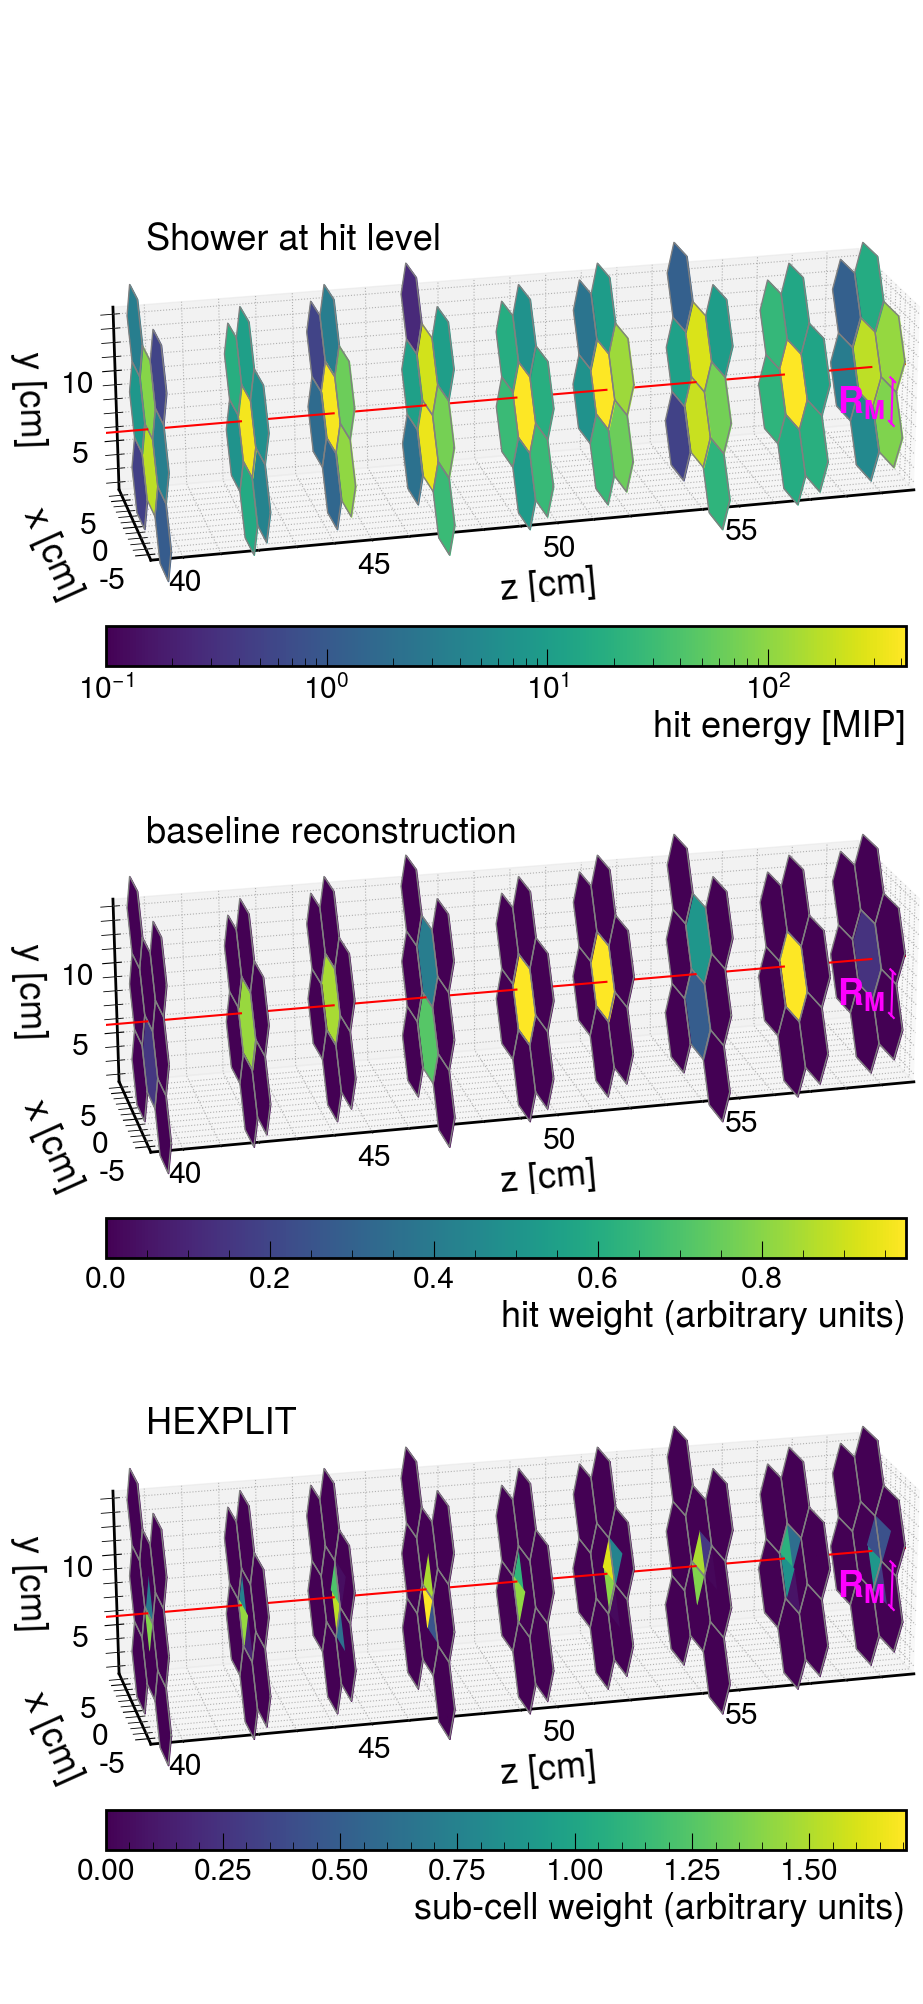

In [28]:
    
    
axs=show_shower("/Users/spaul/Downloads/zdc_reco_neutron_discrete_1GeV-300GeV_theta_0deg-0.5deg_633303_125.edm4hep.root", 
            2, 0, x_offset=-35000*.025/10, 
            x_range=[-70/10, 70/10], y_range=[26/10, 136/10])

#show the RM
# x=-9.5
# y=5
# z=3546.6
x=-10.5
y=6
z=3556.5
x=-7.5
y=7
z=3559
for ax in axs:
    RM=3.1
    a=.5
    ax.plot([z,z],[x,x], [y,y+RM], color='#ff00ff',zorder=calc_zorder(z))
    ax.plot([z,z],[x-a,x+a], [y,y], color='#ff00ff',zorder=calc_zorder(z))
    ax.plot([z,z],[x-a,x+a], [y+RM,y+RM], color='#ff00ff', 
             zorder=1000)
    ax.text(z-0.2,x,y+RM/2, "$R_M$", color='#ff00ff', zorder=calc_zorder(z), weight='bold',
            va='center', ha='right')
    #ax.text(z-0.2,x+1,y+RM/2, "$R_M$", color='#ff00ff', zorder=calc_zorder(z), weight='bold',
    #        va='center', ha='left')

plt.savefig("algorithm_illustration.pdf")


plt.show()

[[-9.39, -7.82, -6.26, -4.7, -3.13, -1.56, -0.0, 1.56], [0.0, 2.71, 5.42, 8.13], [3504.72, 3507.2, 3509.69, 3512.18, 3514.68, 3517.16, 3519.66, 3522.14, 3524.64, 3527.12, 3529.61, 3532.1, 3534.6, 3537.09, 3539.58, 3542.06, 3544.56, 3547.04, 3549.54, 3552.02, 3554.52, 3557.0, 3559.5, 3561.98, 3564.48, 3574.44]]
199.99982


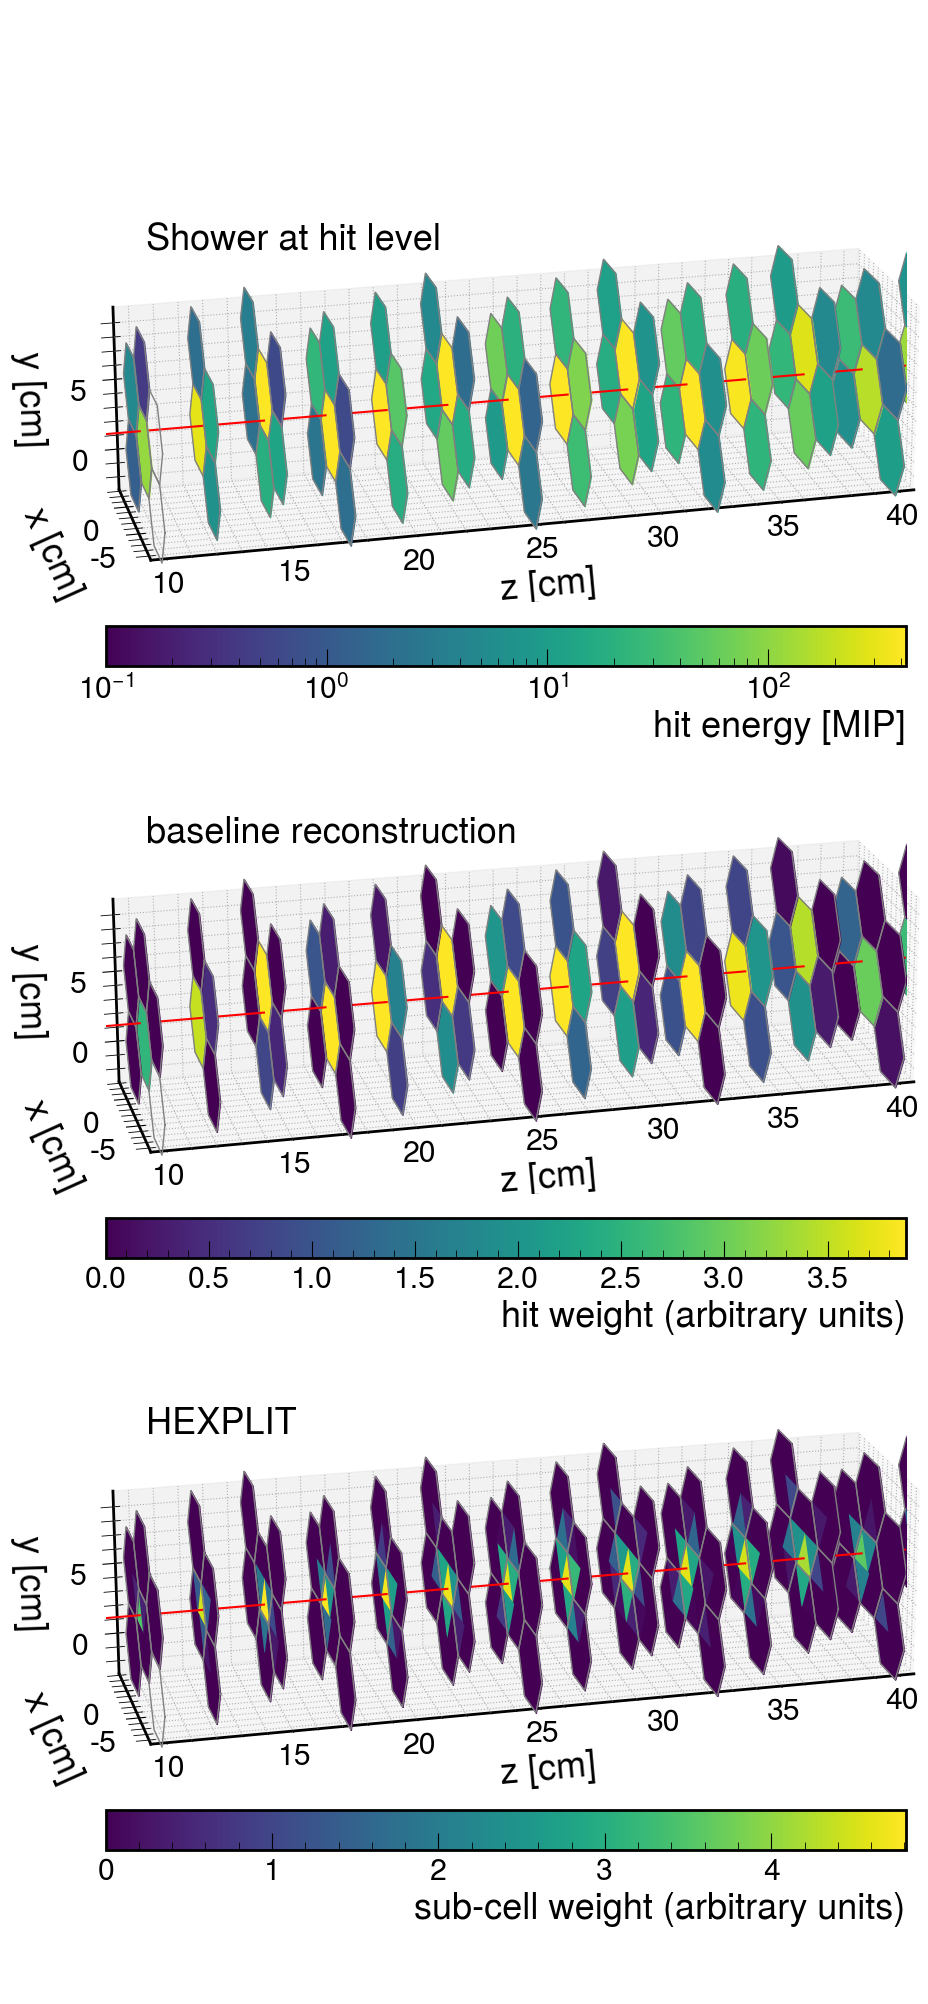

In [38]:
axs=show_shower("dd4hep/zdc_staggered_h3_inf_reco_gamma_200GeV_theta_deg.edm4hep.root", 
            2, 0, x_offset=0, prefix="ZDC", w0_nrw=6.2+np.log(200/50)*.3, 
                w0_rw=6.9+np.log(200/50)*.5, z_range=[35000/10+10, 35000/10+40])#, z_range=[35000/10, ], 
            #x_range=[-70/10, 70/10], y_range=[26/10, 136/10])

#show the RM
# x=-9.5
# y=5
# z=3546.6
x=-10.5
y=6
z=3556.5
x=-7.5
y=7
z=3559
for ax in axs:
    RM=3.1
    a=.5
    ax.plot([z,z],[x,x], [y,y+RM], color='#ff00ff',zorder=calc_zorder(z))
    ax.plot([z,z],[x-a,x+a], [y,y], color='#ff00ff',zorder=calc_zorder(z))
    ax.plot([z,z],[x-a,x+a], [y+RM,y+RM], color='#ff00ff', 
             zorder=1000)
    ax.text(z-0.2,x,y+RM/2, "$R_M$", color='#ff00ff', zorder=calc_zorder(z), weight='bold',
            va='center', ha='right')
    #ax.text(z-0.2,x+1,y+RM/2, "$R_M$", color='#ff00ff', zorder=calc_zorder(z), weight='bold',
    #        va='center', ha='left')

plt.savefig("algorithm_illustration_photon.pdf")


plt.show()

In [200]:
np.roll([1,2,3], 1)

array([3, 1, 2])

In [319]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable=None, cax=None, ax=None, **kw)
    Add a colorbar to a plot.
    
    Parameters
    ----------
    mappable
        The `matplotlib.cm.ScalarMappable` (i.e., `~matplotlib.image.AxesImage`,
        `~matplotlib.contour.ContourSet`, etc.) described by this colorbar.
        This argument is mandatory for the `.Figure.colorbar` method but optional
        for the `.pyplot.colorbar` function, which sets the default to the current
        image.
    
        Note that one can create a `.ScalarMappable` "on-the-fly" to generate
        colorbars not attached to a previously drawn artist, e.g. ::
    
            fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    
    cax : `~matplotlib.axes.Axes`, optional
        Axes into which the colorbar will be drawn.
    
    ax : `~matplotlib.axes.Axes`, list of Axes, optional
        One or more parent axes from which space for a new colorbar axes will be
      

AttributeError: 'Colorbar' object has no attribute 'get_axes'

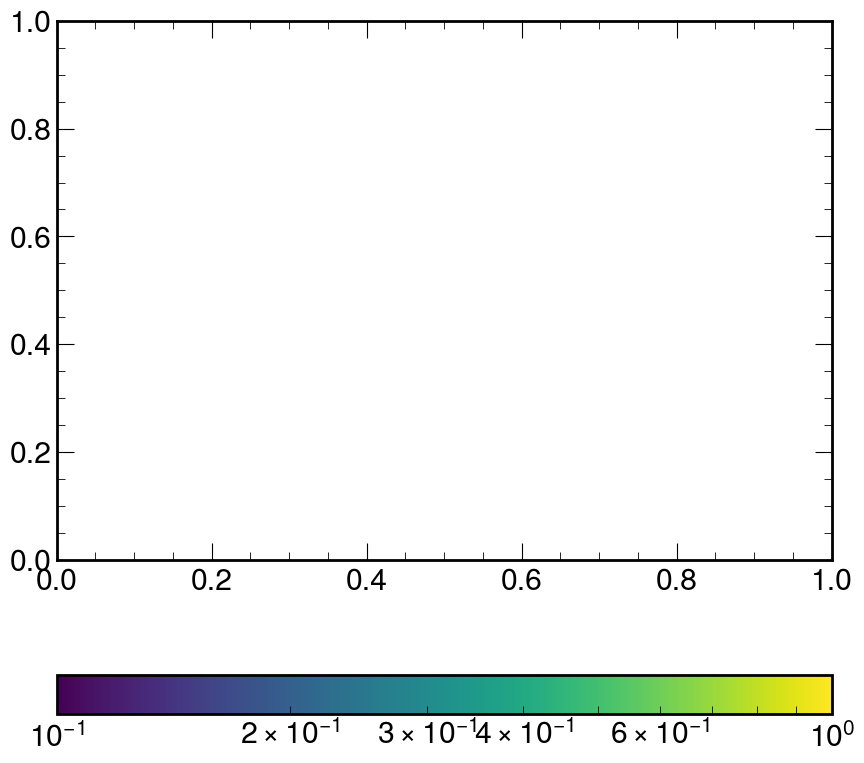

In [338]:
fig,axs = plt.subplots(1,1,figsize=(10,10))
cm = mpl.cm
norm= mpl.colors.LogNorm(vmin=0.1, vmax=1)
cmap = mpl.cm.get_cmap('viridis')
cax=fig.add_subplot()
cax.set_position([0, 0, 1, 0.1])
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal')
cb.solids.set_edgecolor("face")

plt.show()

In [353]:
help(mpl.colors.Normalize)

Help on class Normalize in module matplotlib.colors:

class Normalize(builtins.object)
 |  Normalize(vmin=None, vmax=None, clip=False)
 |  
 |  A class which, when called, linearly normalizes data into the
 |  ``[0.0, 1.0]`` interval.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, value, clip=None)
 |      Normalize *value* data in the ``[vmin, vmax]`` interval into the
 |      ``[0.0, 1.0]`` interval and return it.
 |      
 |      Parameters
 |      ----------
 |      value
 |          Data to normalize.
 |      clip : bool
 |          If ``None``, defaults to ``self.clip`` (which defaults to
 |          ``False``).
 |      
 |      Notes
 |      -----
 |      If not already initialized, ``self.vmin`` and ``self.vmax`` are
 |      initialized using ``self.autoscale_None(value)``.
 |  
 |  __init__(self, vmin=None, vmax=None, clip=False)
 |      Parameters
 |      ----------
 |      vmin, vmax : float or None
 |          If *vmin* and/or *vmax* is not given, they are initializ